<a href="https://colab.research.google.com/github/joshIsac/SpeechRecognition-/blob/main/2348523_ETE__lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#1) generate a sinusoidal signal
import numpy as np
import matplotlib.pyplot as plt
def sinusoidal_signal(A,f,t,theta):
  return A*np.sin(2*np.pi*f*t+theta)

A=1
f=5
d=1 #where d being the duration
theta=2*np.pi/4


# Generate time points to simulate continuity
sampling_frequency=1000
t=np.linspace(0,d,int(sampling_frequency*d),endpoint=False)

signal=sinusoidal_signal(A,f,t,theta)




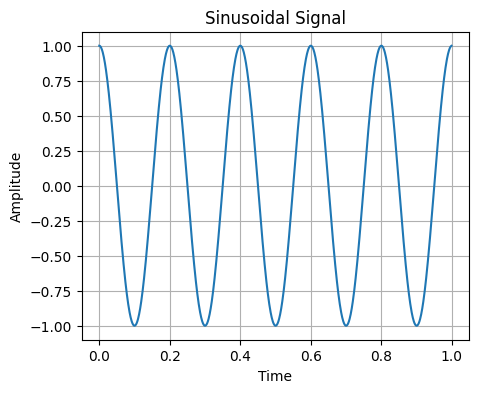

In [3]:
#plot the sinusoidal
plt.figure(figsize=(5, 4))
plt.plot(t,signal)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Sinusoidal Signal')
plt.grid(True)
plt.show()

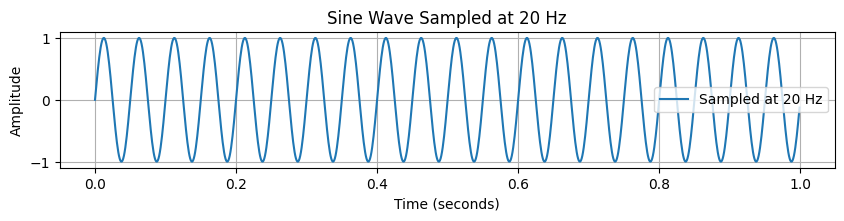

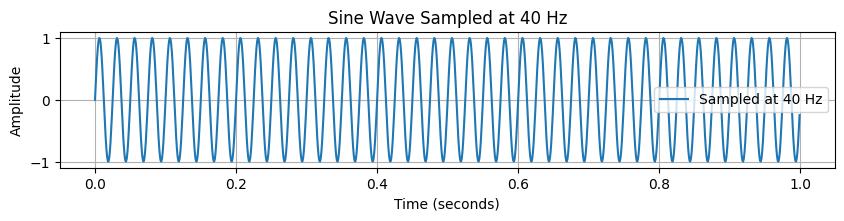

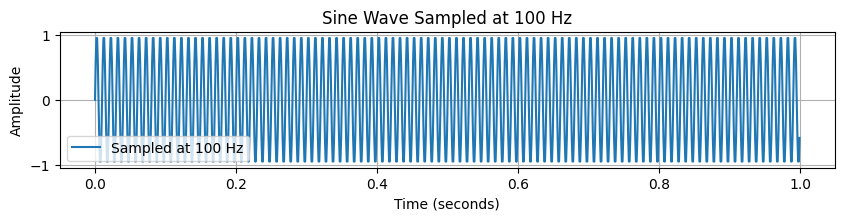

In [4]:
# Define the sine wave function
def sine_wave(A, f, t, theta):
    return A * np.sin(2*np.pi*f*t+theta)

# Sine wave parameters
A = 1  # Amplitude
f = 6  # Frequency of the sine wave (Hz)
theta = 0  # Phase shift

# Define sampling rates
sampling_rates = [20, 40, 100]

duration=1

for i, fs in enumerate(sampling_rates):
    # Time points at which to sample the signal
    t = np.linspace(0, duration,1000, endpoint=False)

    # Generate the sine wave at this sampling rate
    sinusoidal_wave = sine_wave(A, fs, t, theta)

    #plot the waves
    plt.figure(figsize=(10, 6))
    plt.subplot(len(sampling_rates), 1, i + 1)
    plt.plot(t, sinusoidal_wave, label=f'Sampled at {fs} Hz')
    plt.title(f'Sine Wave Sampled at {fs} Hz')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')
    plt.grid(True)
    plt.legend()


plt.show()


inference : here in the above sinusoidal wave we see that if we use sampling rate of 100 hz it gives us the smooth sine curve where as at 20 hx and 40 hz we see that there is a sharp transition or the wave forms are not smoothly represented

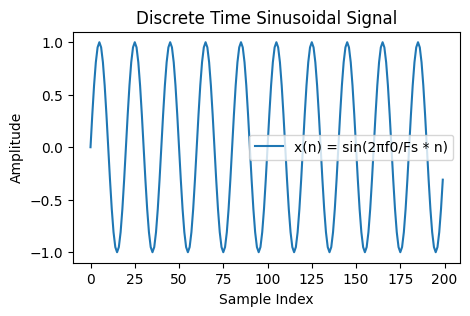

In [5]:
#2)a)generating a discrete time sinusoidal signal
#parameters
f0 = 50  # signal frequency (Hz)
Fs = 1000  # sampling frequency (Hz)
N = 200  # number of samples
n = np.arange(N)  # sample index

# Generate the discrete time sinusoidal signal
x = np.sin(2 * np.pi * (f0/Fs)*n)

# Plot the signal
plt.figure(figsize=(5,3))
plt.plot(n, x,label='x(n) = sin(2πf0/Fs * n)')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.title('Discrete Time Sinusoidal Signal')
plt.legend()
plt.show()


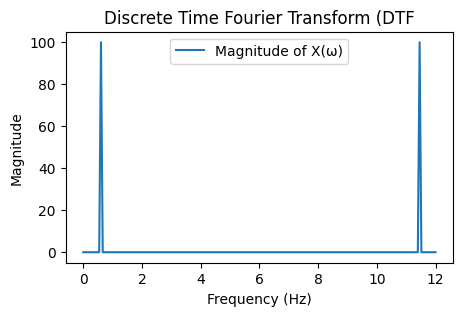

In [6]:
#b)dtft for the discrete sinusoidal wave
def dtft(x,N):
  X=np.zeros(N,dtype=complex)
  n=np.arange(N)
  for k in range(N):
    for n in range(N):
      omega=2*np.pi*k/N
      X[k]+=x[n]*np.exp(-1j*omega*n)
  return X

N=200
X_dtft = dtft(x, N)

# Frequency axis for plotting
frequencies = np.linspace(0, 1, N) * f * 2  # Normalized frequency axis

#plot the DTFT magnitude
plt.figure(figsize=(5,3))
plt.plot(frequencies,np.abs(X_dtft),label='Magnitude of X(ω)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Discrete Time Fourier Transform (DTF')
plt.legend()
plt.show()




Fourier transform helps in analyzing the signals to tramnsform into frequency domain and the time domain
DTFT can be defined as a  
A discrete-time signal that is  represented in the frequency domain and  the Fourier transform of a discrete time sequence is called the discrete-time Fourier transform (DTFT).

inference from DTFT:
There is a significant peak observed around the frequency corresponding to 50 Hz, which is expected. This confirms that the sinusoidal signal generated has a fundamental frequency of 50 Hz, as per the original signal definition
𝑓0=50Hz

The high sampling rate ensures that no aliasing occurs, and the frequency spectrum is symmetric, with the primary energy localized at the 50 Hz frequency component.


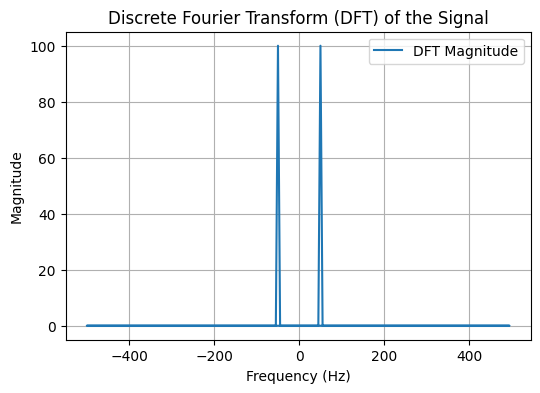

In [7]:
#c)Compute the Discrete Fourier Transform (DFT)
def dft(signal):
  N=len(signal)
  X=np.zeros(N,dtype=complex)
  for k in range(N):
    for n in range(N):
      omega=2*np.pi*k/N
      X[k]+=signal[n]*np.exp(-1j*omega*n)
  return X

# Compute the DFT
X_dft = dft(x)
# Plot the magnitude of the DFT
frequencies = np.fft.fftfreq(N, d=1/Fs)

# Plot the magnitude of the DFT
frequencies = np.fft.fftfreq(N, d=1/Fs)  # Frequency axis for DFT

plt.figure(figsize=(6, 4))
plt.plot(frequencies, np.abs(X_dft), label='DFT Magnitude')
plt.title('Discrete Fourier Transform (DFT) of the Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.legend()
plt.show()

inference:  in this signal of DFT for sinusoidal wave we see that it Provides a discrete spectrum with fewer frequency points, as it samples the frequency axis at 𝑁 samplepoints (the number of samples in the signal). It approximates the continuous DTFT but is limited to a fixed set of frequencies.i.e 50hz
now initially we see a sinusoidal signal which is smooth curve but after applying the DTFT signal at the initial frequency f0 = 50 there are multiple peaks observed 50 hz

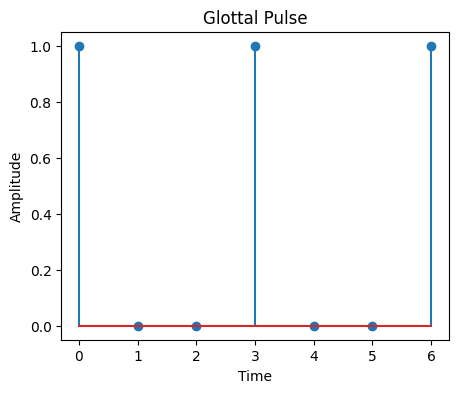

In [8]:
#3)a)awrite a program to implement a source filter model for the synthesis of speech

import numpy as np
import matplotlib.pyplot as plt

#glottal pulse
X=np.array([1,0,0,1,0,0,1])
n = np.arange(len(X))

#plot the signal
plt.figure(figsize=(5,4))
plt.stem(n,X,label='Glottal Pulse')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Glottal Pulse')
plt.show()

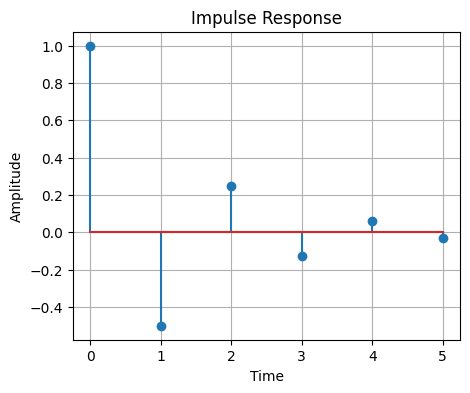

In [10]:
#b)define a vocal tract model
h=np.array([1,-0.5,0.25,-0.125,0.0625,-0.03125])
n=np.arange(len(h))

#plotting the impulse
plt.figure(figsize=(5,4))
plt.stem(n,h)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

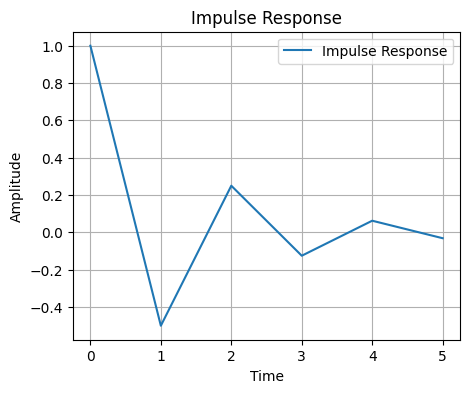

In [ ]:
#plotting the impulse
plt.figure(figsize=(5,4))
plt.plot(n,h,label='Impulse Response')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Impulse Response')
plt.grid(True)
plt.show()

<ipython-input-44-d8707abc5d30>:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(n,y,use_line_collection=True)


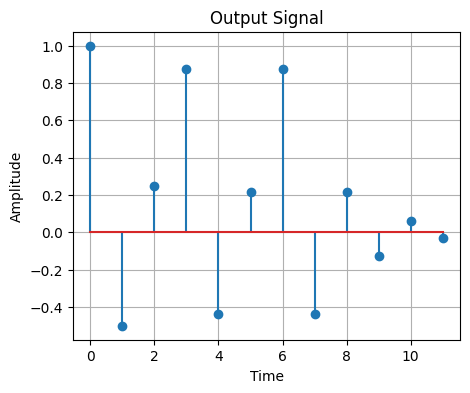

In [ ]:
#perform linear convolution
y=np.convolve(X,h)
#plot the output
n=np.arange(len(y))
plt.figure(figsize=(5,4))
plt.stem(n,y,use_line_collection=True)
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.grid(True)
plt.show()

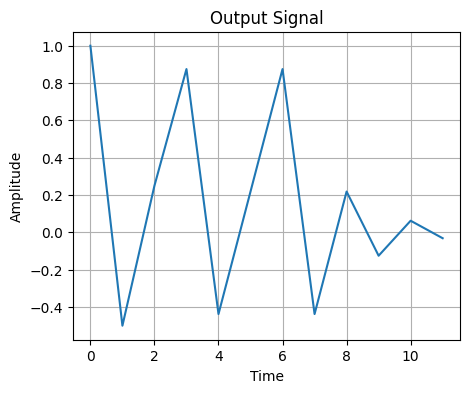

In [ ]:
plt.figure(figsize=(5,4))
plt.plot(n,y,label='linear convolution')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Output Signal')
plt.grid(True)
plt.show()

In the above program  we can priovide the inference stating that :
we have a source signal x(n) in a array which is an impulse train for the glottal pulse represented in the form of an array [1,0,0,1,0,0,1]
and also we have a vocal tract model of a simple discrete coefficints representing the impulse response
when we convolve both the signals that is multiplying both the signals we see smooth and sharpened curve
